In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def cleandata(filename, daterange):
  #data = np.genfromtxt(filename, comments="#", delimiter = "", usecols = (0,1,2,3,4,5))

  data = pd.read_csv(filename, names = ['freq', 'bin', 'Nufnu', 'error', 'ti', 'tf'] , comment='#', delim_whitespace=True)

  condx = (data['freq'] > 1e16 ) & (data['freq'] < 1e20 )
  condg = (data['freq'] > 1e24 ) & (data['freq'] < 1e28 )

  datax = data[condx]
  datag = data[condg]
  
  condtimex = ( datax['ti'] > daterange[0] ) &  ( datax['ti'] < daterange[1] )
  condtimeg = ( datag['ti'] > daterange[0] ) &  ( datag['ti'] < daterange[1] )

  return datax[condtimex], datag[condtimeg]

In [ ]:
#filename = '/content/PKS2155304.txt'
#rt = [52500, 52660]

#filename = '/content/MRK501.txt'
#rt = [53380, 53500]

filename = '/content/MRK421.txt'
rt = [53100, 53200]
datx, datg = cleandata(filename, rt)

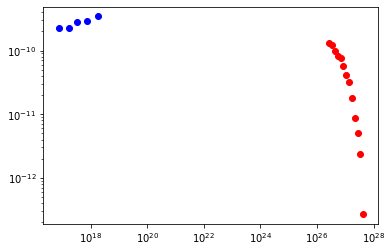

In [ ]:
plt.scatter(datx['freq'], datx['Nufnu'], color = 'b')
plt.scatter(datg['freq'], datg['Nufnu'], color = 'r')
plt.yscale('log')
plt.xscale('log')

In [ ]:
#constantes 
pi = np.pi
sigmaT = sigmaT=6.65 * pow(10,-25) #cm2
c = 2-99e10 #cms-1
m_e = 9.11e-28 #g
q_e = 4.8e-10 #stratc


In [ ]:
#parametros libres
#B = 0.1e0              #Campo magnetico [Gauss]
#Gamma = 6.25           #Factor de lorentz del Jet (bulk lorentz factor)
#alpha = 2.3            #indice espectral de fotones
#alpha_e = 2*alpha - 2  #indice espectral de electrones (p en el SED_tools)
#N_oe = 1e3             #Densidad de elecrones [cm3] (N en el SED_tools)
#U_oe = me*N_oe         #Densidad de energía
#U_B = B**2/8*pi        #Densidad de campo magnetico en unidades naturales
#r_d = 4e16             #radio de la región emisora [cm] (R del codigo de SED_tools)
Mpc = 3.086e24         #Mega parsec [cm]
#delta_D = Gamma
delta_z = 140*Mpc      #distancia de la fuente 

'''
Me confundi! el delta_D es factor de lorenz. Entonces todas las delta_D son igual a las Gamma
'''


'\nMe confundi! el delta_D es factor de lorenz. Entonces todas las delta_D son igual a las Gamma\n'

In [ ]:
#Factor de Loretnz min, cooling, max
gamma_min = ( (alpha_e - 2)/(m_e * (alpha_e -1) ) ) * U_oe/N_oe
gamma_c = ( (3 * m_e) / ( 4 * sigmaT) ) * delta_D * pow(r_d, -1) * pow(U_B, -1) * (1 + U_oe/U_B)
gamma_max = np.sqrt( ( pow(2/pi, 1/2) * 3 * q_e * pow(U_B, -1/2) ) / 4 * sigmaT )

NameError: ignored

In [ ]:
#Las expresiones para Ne y Ue son las aproximadas 
def Ne(N_oe, gamma_min, alpha_e):
  return (N_oe / (alpha_e - 1)) * pow(gamma_min, -alpha_e + 1)
   
def U_e(N_oe, gamma_min, alpha_e):
  return (N_oe * me/(alpha_e - 1)) * pow(gamma_min, -alpha_e + 2) 
   

In [ ]:
#Sincrotron
Eps_min = ( pow(8 * pi, 1/2) * q_e * delta_D * pow(U_B, 1/2) * pow(gamma_min, 2) ) / 2
Eps_c = ( ( 9 * pow(2 * pi, 1/2) * q_e * m_e * pow(1 + U_e/U_B, -2) * pow(delta_D, 3) * pow(U_B, -3/2) * pow(r_d, -2) ) / (8 * pow(sigmaT, 2) ) )
Eps_max = ( ( 3 * pow(q_e, 2) * delta_D ) / ( m_e * sigmaT ) ) 

In [ ]:
#Energia de cooling
def Esyn_c(r_d,U_B,U_e,N_e,Gamma,alpha_e):
    Ec = ( ( 9 * (8*pi)**(1/2) * q_e * m_e * (1 + U_e/U_B,)**(2) * Gamma**(3) * U_B**(-3/2) * (r_d)**(-2) ) / (16 * (sigmaT)**(2) ) )
    return Ec

In [ ]:
#RAYOS-X
#factor de normalizacion de sincrotron
def Asyn(r_d,U_B,U_e,N_e,Gamma,alpha_e):
    Emin = (8 * pi)**(1/2)* q_e * (alpha_e - 2)**(2)/(m_e**(3) * (alpha_e - 1)**(2)) * Gamma * U_B**(1/2) * (U_e/N_e)**(2)
    Ec = ( ( 9 * (8*pi)**(1/2) * q_e * m_e * (1 + U_e/U_B,)**(2) * Gamma**(3) * U_B**(-3/2) * (r_d)**(-2) ) / (16 * (sigmaT)**(2) ) )
    const = 1.0 / ( 4.0 * q_e ) * m_e**(2.0) / sigmaT
    return const * Gamma**5.0 * U_B**(-1.0) * N_e * r_d**1.0 / delta_z**2.0 * (Ec / Emin)**(-(alpha_e - 1.0 ) / 2.0) * cm**(2.0)*sec/keV

flujo rayos X [ergcm-2s-1] [6.56911633e-13 6.55581209e-13 6.54638892e-13 6.53908907e-13
 6.53313070e-13 6.52809721e-13 6.52374013e-13 6.51989933e-13
 6.51646554e-13]


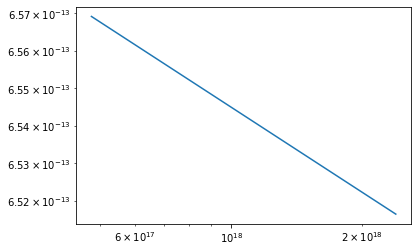

In [ ]:
###---FLUJO

#constantes
pi = np.pi

# Escalas de energia
eV = 1
keV = 1e3 * eV
MeV = 1e6 * eV
Jule=1/1.602176462 * 1e19 * eV
erg= 1e-7 * Jule
Hz=eV/4.189e-15

# Masa
m_e = 0.510998902 * MeV

#Unidades de carga electica
alph = 7.297352533 * 1e-3
q_e = 8.542 * 1e-2 # Gaussian

#Unidades de campo magnetico
Gauss=5.788381749 *  1e-15 *  MeV * 2 * m_e/q_e

#Escalas de distancia 
fm = 1/197.3269602 * 1/MeV 
cm = 1e13 * fm
meter = 1e2 * cm

#Escalas de tiempo
sec = 299792458*meter

#Seccion eficaz
sigmaT = 6.65e-25 * cm**2

### --- RAYOS-X ---
#Energia de cooling
def Esyn_c(r_d,U_B,U_e,N_e,Gamma,alpha_e):
    Ec = ( ( 9 * (8*pi)**(1/2) * q_e * m_e * (1 + U_e/U_B)**(2) * Gamma**(3) * U_B**(-3/2) * (r_d)**(-2) ) / (16 * (sigmaT)**(2) ) )
    return Ec

#factor de normalizacion de sincrotron
def Asyn(r_d,U_B,U_e,N_e,Gamma,alpha_e):
    Emin = (8 * pi)**(1/2)* q_e * (alpha_e - 2)**(2)/(m_e**(3) * (alpha_e - 1)**(2)) * Gamma * U_B**(1/2) * (U_e/N_e)**(2)
    Ec = ( ( 9 * (8*pi)**(1/2) * q_e * m_e * (1 + U_e/U_B)**(2) * Gamma**(3) * U_B**(-3/2) * (r_d)**(-2) ) / (16 * (sigmaT)**(2) ) )
    const = 1.0 / ( 4.0 * q_e ) * m_e**2.0 / sigmaT
    return const * Gamma**5.0 * U_B**(-1.0) * N_e * r_d**1.0 / delta_z**2.0 * (Ec / Emin)**(-(alpha_e - 1.0 ) / 2.0) * cm**(2.0)*sec/keV


#Para el flujo de rayos X
Emin_X = 2.0    #keV
Emax_X = 10.0   #keV

#flujo del SED rayos X
#E_x es la energía en rayos X, en este caso en el rango de 2 a 10 keV y hay que evaluar Fx en cada punto de este rango

Flux_X = []
for E_X in range(2, 11, 1): #integra energía rayos x desde Emin_x hasta Emax_X

    r_d = 1e17
    B = 0.1*Gauss
    U_B = B/(8.0*pi)
    N0_e = 1e1
    N_e = N0_e*1.0/(cm**3.0)
    U_e = m_e*N_e
    Gamma = 6.25
    alpha_e = 2.01
    alpha = 1 + alpha_e/2

    Esyn_cX=Esyn_c(r_d,U_B,U_e,N_e,Gamma,alpha_e)
    Esyn_cX_keV=Esyn_cX/keV #poniendo la energia de cooling Ec en keV
    Asyn_X = Asyn(r_d,U_B,U_e,N_e,Gamma,alpha_e)

    Fx = Asyn_X*(E_X/Esyn_cX_keV)**(-alpha+2.0)*(keV/erg)

    Flux_X = np.append(Flux_X, Fx)
print('flujo rayos X [ergcm-2s-1]', Flux_X)


#energia rayos x
Energy_x = np.arange(2,11,1)*1.0e3*Hz #eV

plt.plot(Energy_x, Flux_X)
plt.xscale('log')
plt.yscale('log')


In [ ]:
### --- Rayos Gamma ---



#factor de normalización para el pico IC
def Aic(r_d,U_b,U_e,N_e,Gamma,p_1):

    Eps_min = ( np.sqrt(8 * pi) ( (pow(alpha, 4)) * q_e  / (pow(alpha - 1, 4) * pow(m_e, 5)) ) ) * delta_D * (pow(U_B, 1 / 2) * ( pow(U_e, 4)) / pow(N_e, 4) )
    Eps_c = ( ( 81 * q_e * pow(m_e, 3) ) / (256 * pow(sigma_T, 4)) ) * np.sqrt(2 * pi) * pow(sigma_D, 5) * pow(r_d, -4) * pow((1 + U_e / U_B), -4) * pow(U_B, -7 / 2)
    const = 1.0 / ( 4.0 * q_e ) * pow(m_e, 2.0) / sigmaT
    Asyn = const * pow( Gamma, 5.0) * pow( U_B, -1.0) * N_e * pow(r_d, 1.0) / pow(delta_z, 2.0) * pow( Ec / Em, -(alpha_e - 1.0 ) / 2.0) # *pow(cm,2.0)*sec/keV
    Y = pow(N_e * m_e / U_B, 1.0/2.0)
    
    return Y*Asyn

In [ ]:
#Self compton emission
N_e = (N_oe / (alpha_e - 1)) * pow(gamma_min, -alpha_e + 1) 
U_e =((N_oe * me) / alpha_e - 2) * pow(gamma_min, -alpha_e + 2)
gamma_min = ((alpha_e - 2)/(me * (alpha_e - 1))) * U_e / N_e
gamma_c = ((3 * me) / (4 * sigmaT)) * delta_D * pow(r_d, -1) * pow(U_B, -1) * (1 + U_e / U_B)
gamma_max = np.sqrt( np.sqrt(2 / pi) * ((3 * q_e) / (4 * sigmaT)) * pow(U_B,-1 / 2)   ) 
E_min =  ( (np.sqrt(8 * pi) * pow(alpha_e - 2, 2)) / (pow(alpha_e - 1, 2) * pow(me, 3)) ) * q_e * delta_D * (pow(U_B,1 / 2) * pow(U_e, 2)) / (pow(N_e,2)) 
E_c = ( (9 * q_e * m_e) / (16 * sigmaT) ) * np.sqrt(8 * pi) * pow(delta_D,3) * pow(r_d, -2) * pow(U_B, -3 / 2) * (pow(1 + U_e / U_B, 2))

E_max = ( (3 * pow(q_e, 2)) / (sigmaT * m_e) ) * delta_D
Eps_min = ( np.sqrt(8 * pi) ( (pow(alpha, 4)) * q_e  / (pow(alpha - 1, 4) * pow(m_e, 5)) ) ) * delta_D * (pow(U_B, 1 / 2) * ( pow(U_e, 4)) / pow(N_e, 4) )
Eps_c = ( ( 81 * q_e * pow(m_e, 3) ) / (256 * pow(sigma_T, 4)) ) * np.sqrt(2 * pi) * pow(sigma_D, 5) * pow(r_d, -4) * pow((1 + U_e / U_B), -4) * pow(U_B, -7 / 2)
Eps_max = ( 9 / 4 ) * np.sqrt(2 / pi) * (pow(q_e, 3) / (pow(sigma_T, 2) * m_e) ) * sigma_D * pow(U_B, -1 / 2)

In [ ]:
#factor de normalización para el pico IC
def Aic(r_d,U_b,U_e,N_e,Gamma,p_1):

    Eps_min = ( np.sqrt(8 * pi) ( (pow(alpha, 4)) * q_e  / (pow(alpha - 1, 4) * pow(m_e, 5)) ) ) * delta_D * (pow(U_B, 1 / 2) * ( pow(U_e, 4)) / pow(N_e, 4) )
    Eps_c = ( ( 81 * q_e * pow(m_e, 3) ) / (256 * pow(sigma_T, 4)) ) * np.sqrt(2 * pi) * pow(sigma_D, 5) * pow(r_d, -4) * pow((1 + U_e / U_B), -4) * pow(U_B, -7 / 2)
    const = 1.0 / ( 4.0 * q_e ) * pow(m_e, 2.0) / sigmaT
    Asyn = const * pow( Gamma, 5.0) * pow( U_B, -1.0) * N_e * pow(r_d, 1.0) / pow(delta_z, 2.0) * pow( Ec / Em, -(alpha_e - 1.0 ) / 2.0) # *pow(cm,2.0)*sec/keV
    Y = pow(N_e * m_e / U_B, 1.0/2.0)
    
    return Y*Asyn

In [ ]:
#Para el flujo de rayos X
Esyn_cXX_keV=Esyn_c/keV
Emin_X = 2.0 #keV
Emax_X = 10.0 #keV
#flujo del SED rayos X
#Fx=Asyn/(alpha-2.0)*(pow(Emin_X/Esyn_cXX_keV,-alpha+2.0)-pow(Emax_X/Esyn_cXX_keV,-alpha+2.0))*(keV/erg) #flux in x with erg/cm^2 s^-1    
#E_x es la energía en rayos X, en este caso en el rango de 2 a 10 keV y hay que evaluar Fx en cada punto de este rango
Fx = Asyn*(pow(E_X/Esyn_cXX_keV,-alpha+2.0) #hay que revisar las unidades de Asyn para que Fx esté en ergcm-2s-1
print('flujo rayos X [ergcm-2s-1]', Fx)


In [ ]:
#Para el flujo en rayos gamma
Eic_cXX_TeV=Eic_c/TeV
E_cut=4.0*TeV
Emin=0.4*TeV
Emax=10.0*TeV
#this would be the flux in gamma with erg/cm^2 s^-1
Fgamma=Aic/(alpha-2.0)*(pow(Emin/Eic_c,-alpha+2.0) - pow(Emax/Eic_c,-alpha+2.0)*(erg/TeV)
print('flujo rayos gamma [ergcm-2s-1]', Fgamma)
#reemplazar el Fgamma por la relacion resaltada en rojo en la pagina de "conceptos aprendidos"

Todos los parametros definidos anteriormente: B, Gamma, U_B, N_e, U_e, alpha, alpha_e son variables. Debemos poner el Fx y Fgamma en un ciclo en donde esos parámetros varian. El único parámetro fijo es r_d.

In [ ]:
'''
#ejemplo
for kk in np.linspace(alpha_1Min,alpha_1Max-alpha_1Step,nsteps): #alpha_1 interval
    for ii in np.arange(neMin,neMax,neStep): #Ne interval
        for jj in np.arange(bMin,bMax,bStep): #B field interval
                Gamma=gMin #using a single value for Gamma (lorentz factor)
                alpha = kk
                alpha_e = 2.0*alpha_1-2.0

                B0=jj
                B=B0*Gauss

                N0_e=pow(10.0,ii)
                N_e=N0_e*1.0/pow(cm,3.0)

                U_e=me*N_e
                U_B=pow(B,2.0)/(8.0*pi)

                Esyn_cXX=Esyn_c(r_d,U_B,U_e,N_e,Gamma,p_1)
                Eic_cXX=Eic_c(r_d,U_B,U_e,N_e,Gamma,p_1)
                AsynXX=Asyn(r_d,U_B,U_e,N_e,Gamma,p_1)
                AicXX=Aic(r_d,U_B,U_e,N_e,Gamma,p_1)

                if (Esyn_cXX < 2000.0 and Eic_cXX < 0.4e12):

                    Esyn_cXX_keV=Esyn_cXX/keV
                    Emin_X = 2.0 #keV
                    Emax_X = 10.0 #keV
                    #flujo del SED rayos X
                    #FluxSEDX = []
                    #for enX in range(2,11, 1):#integra energía rayos x desde 2 a 10 keV
                    Fx=AsynXX/(alpha_1-2.0)*(pow(Emin_X/Esyn_cXX_keV,-alpha_1+2.0)-pow(Emax_X/Esyn_cXX_keV,-alpha_1+2.0))*(keV/erg) #flux in x with erg/cm^2 s^-1
                    print('flujo rayos X [ergcm-2s-1]', Fx)

                    
                    ##---rayos gamma---
                    Eic_cXX_TeV=Eic_cXX/TeV
                    E_cut=4.0*TeV
                    Emin=0.4*TeV
                    Emax=10.0*TeV

                    #this would be the flux in gamma with erg/cm^2 s^-1
                    Fgamma=AicXX/(alpha_1-2.0)*(pow(Emin/Eic_cXX,-alpha_1+2.0)*exp(-Emin/E_cut)- pow(Emax/Eic_cXX,-alpha_1+2.0)*exp(-Emax/E_cut))*(erg/TeV) - AicXX/(alpha_1-2.0)*(pow(Eic_cXX/E_cut,alpha_1-2.0)*gamma(3-alpha_1))*(erg/TeV)
                    print('flujo rayos gamma [ergcm-2s-1]', Fgamma)
'''                    


Pagina del modelo teorico
https://www.notion.so/Modelo-Te-rico-4034b5161725430bbe4f03f317ecc337

Página de la relacion del flujo del SED y de las unidades naturales
https://www.notion.so/Conceptos-aprendidos-d5a14af6f9ca437dba8645da0f11c17e

Página SED tools para comparar con el codigo
http://www.isdc.unige.ch/sedtool/PROD/html_js/SED_Web_tool/Doc/test_doc/index.html